In [6]:
cv2.__version__

'3.4.2'

In [3]:
img1.shape

(183, 275)

In [45]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('stop.jpeg',0)          # queryImage
img2 = cv2.imread('stop2.jpeg',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 500, nOctaveLayers = 4, contrastThreshold = 0.04, edgeThreshold = 10, sigma = 1.6) #add more points.
#sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)  #print points
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 15)
search_params = dict(checks = 500)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

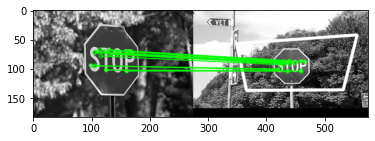

(<matplotlib.image.AxesImage at 0x7fe1f8124e48>, None)

In [46]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('book.jpeg',0)          # queryImage
img2 = cv2.imread('book2.jpeg',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 500, nOctaveLayers = 4, contrastThreshold = 0.04, edgeThreshold = 10, sigma = 1.6) #add more points.
#sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)  #print points
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 15)
search_params = dict(checks = 500)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

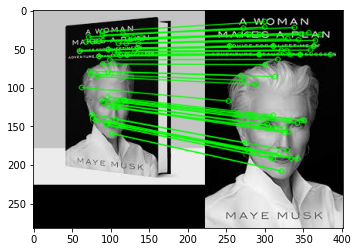

(<matplotlib.image.AxesImage at 0x7fe1f8485ba8>, None)

In [20]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [68]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('box.png',0)          # queryImage
img2 = cv2.imread('box2.png',0) # trainImage
# Initiate SIFT detector
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 500, nOctaveLayers = 10, contrastThreshold = 0.02, edgeThreshold = 5, sigma = 1.6) #add more points.
#sift = cv.SIFT_create()
#sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 500)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

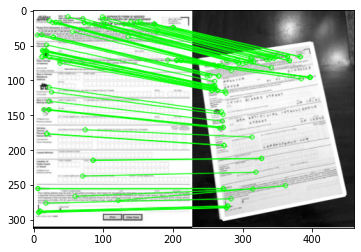

(<matplotlib.image.AxesImage at 0x7fe1f2d03358>, None)

In [69]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [71]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('star.jpeg',0)          # queryImage
img2 = cv2.imread('star2.jpeg',0) # trainImage
# Initiate SIFT detector
#sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 500, nOctaveLayers = 10, contrastThreshold = 0.02, edgeThreshold = 5, sigma = 1.6) #add more points.
#sift = cv.SIFT_create()
#sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 500)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

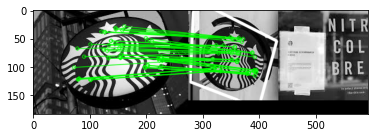

(<matplotlib.image.AxesImage at 0x7fe1f2cd7b70>, None)

In [72]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [99]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('cd.jpeg',0)          # queryImage
img2 = cv2.imread('cd2.jpeg',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 3000, nOctaveLayers = 10, contrastThreshold = 0.08, edgeThreshold = 0.5, sigma = 1.6) #add more points.
#sift = cv.SIFT_create()
#sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 5
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 150)
search_params = dict(checks = 500)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

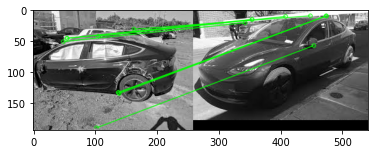

(<matplotlib.image.AxesImage at 0x7fe1f2836198>, None)

In [100]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [145]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv2.imread('ccdd.jpeg',0)          # queryImage
img2 = cv2.imread('ccdd2.jpeg',0) # trainImage
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create(nfeatures = 1800, nOctaveLayers = 12, contrastThreshold = 0.05, edgeThreshold = 5, sigma = 1.6) #add more points.
#sift = cv.SIFT_create()
#sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
FLANN_INDEX_KDTREE = 5
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 150)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.95*n.distance:
        good.append(m)
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

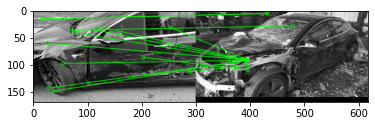

(<matplotlib.image.AxesImage at 0x7fe1f21fe9b0>, None)

In [146]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
plt.imshow(img3, 'gray'),plt.show()

In [ ]:
import numpy as np 
import cv2 
   
      
# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
query_img = cv2.imread('ben.jpeg') 
train_img = cv2.imread('ben2.jpeg') 
   
# Convert it to grayscale 
#query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
#train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

query_img_bw = cv2.cvtColor(query_img,cv2.IMREAD_GRAYSCALE) 
train_img_bw = cv2.cvtColor(train_img, cv2.IMREAD_GRAYSCALE)
HARRIS_SCORE = 12
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create(nfeatures = 300,
             scaleFactor = 1.4,
             nlevels = 8,
             edgeThreshold = 11,
             firstLevel = 0,
             WTA_K = 2,
             scoreType = HARRIS_SCORE,
             patchSize = 11,
             fastThreshold = 30) 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
cv2.imshow("Matches", final_img) 
cv2.waitKey(3000) 

In [1]:
import numpy as np 
import cv2 
   
      
# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
query_img = cv2.imread('ccdd.jpeg') 
train_img = cv2.imread('ccdd2.jpeg') 
   
# Convert it to grayscale 
#query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
#train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

query_img_bw = cv2.cvtColor(query_img,cv2.IMREAD_GRAYSCALE) 
train_img_bw = cv2.cvtColor(train_img, cv2.IMREAD_GRAYSCALE) 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
cv2.imshow("Matches", final_img) 
cv2.waitKey(3000) 

-1

In [2]:
import numpy as np 
import cv2 
   
      
# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
query_img = cv2.imread('cd.jpeg') 
train_img = cv2.imread('cd2.jpeg') 
   
# Convert it to grayscale 
#query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
#train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

query_img_bw = cv2.cvtColor(query_img,cv2.IMREAD_GRAYSCALE) 
train_img_bw = cv2.cvtColor(train_img, cv2.IMREAD_GRAYSCALE) 
# Initialize the ORB detector algorithm 
#orb = cv2.ORB_create() 
orb = cv2.ORB_create(nfeatures = 500, scaleFactor = 1.2, nlevels = 8, edgeThreshold = 31,
firstLevel = 0, WTA_K = 2, scoreType = HARRIS_SCORE, patchSize = 31, fastThreshold = 20)
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
cv2.imshow("Matches", final_img) 
cv2.waitKey(3000) 

NameError: name 'HARRIS_SCORE' is not defined

In [ ]:
import numpy as np 
import cv2 
   
      
# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
query_img = cv2.imread('shoe.jpeg') 
train_img = cv2.imread('shoe2.jpeg') 
   
# Convert it to grayscale 
#query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
#train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

query_img_bw = cv2.cvtColor(query_img,cv2.IMREAD_GRAYSCALE) 
train_img_bw = cv2.cvtColor(train_img, cv2.IMREAD_GRAYSCALE) 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
cv2.imshow("Matches", final_img) 
cv2.waitKey(3000) 

In [2]:
import numpy as np 
import cv2 
   
      
# Read the query image as query_img 
# and traing image This query image 
# is what you need to find in train image 
# Save it in the same directory 
# with the name image.jpg   
query_img = cv2.imread('stop.jpeg') 
train_img = cv2.imread('stop2.jpeg') 
   
# Convert it to grayscale 
#query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY) 
#train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY) 

query_img_bw = cv2.cvtColor(query_img,cv2.IMREAD_GRAYSCALE) 
train_img_bw = cv2.cvtColor(train_img, cv2.IMREAD_GRAYSCALE) 
# Initialize the ORB detector algorithm 
orb = cv2.ORB_create() 
   
# Now detect the keypoints and compute 
# the descriptors for the query image 
# and train image 
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None) 
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None) 
  
# Initialize the Matcher for matching 
# the keypoints and then match the 
# keypoints 
matcher = cv2.BFMatcher() 
matches = matcher.match(queryDescriptors,trainDescriptors) 
   
# draw the matches to the final image 
# containing both the images the drawMatches() 
# function takes both images and keypoints 
# and outputs the matched query image with 
# its train image 
final_img = cv2.drawMatches(query_img, queryKeypoints,  
train_img, trainKeypoints, matches[:20],None) 
   
final_img = cv2.resize(final_img, (1000,650)) 
  
# Show the final image 
cv2.imshow("Matches", final_img) 
cv2.waitKey(300)

-1